<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/Lect/CNN_Vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vizualizing CNN
Here we will try to get the intermidiate images from a CNN

We are using **VGG16** model for the same as we need some trained model so using a pretrained model

In [25]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils import plot_model
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model

import matplotlib.pyplot as plt
import numpy as np

In [26]:
model = VGG16()

In [27]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

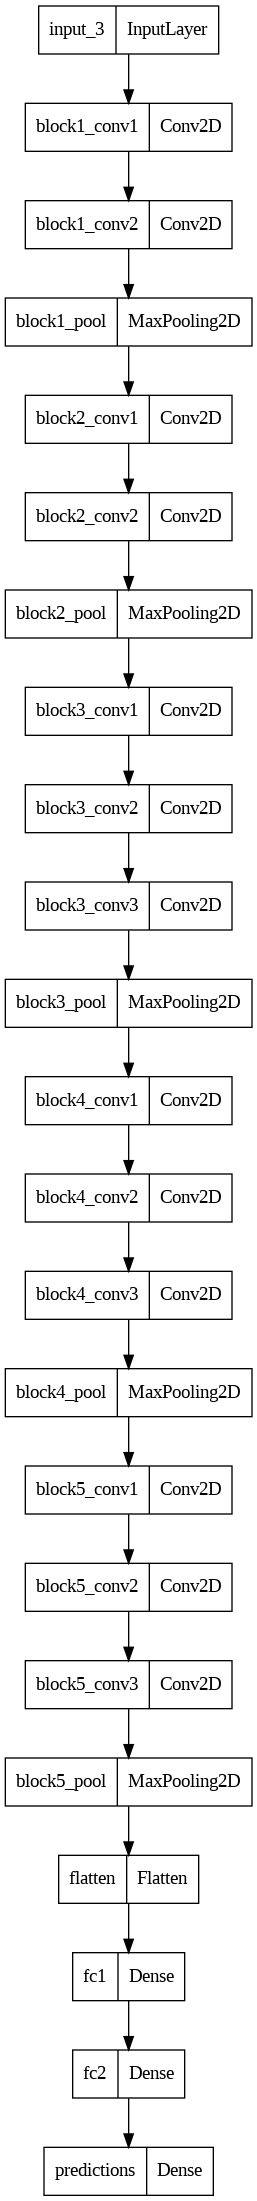

In [28]:
plot_model(model)

In [29]:
for i in range (len(model.layers)):
  # check if the layer is cololutional layer or not
  if 'conv' not in model.layers[i].name:
    continue

  filters, biases = model.layers[i].get_weights()
  print("Layer Number: ", i, model.layers[i].name, filters.shape)

Layer Number:  1 block1_conv1 (3, 3, 3, 64)
Layer Number:  2 block1_conv2 (3, 3, 64, 64)
Layer Number:  4 block2_conv1 (3, 3, 64, 128)
Layer Number:  5 block2_conv2 (3, 3, 128, 128)
Layer Number:  7 block3_conv1 (3, 3, 128, 256)
Layer Number:  8 block3_conv2 (3, 3, 256, 256)
Layer Number:  9 block3_conv3 (3, 3, 256, 256)
Layer Number:  11 block4_conv1 (3, 3, 256, 512)
Layer Number:  12 block4_conv2 (3, 3, 512, 512)
Layer Number:  13 block4_conv3 (3, 3, 512, 512)
Layer Number:  15 block5_conv1 (3, 3, 512, 512)
Layer Number:  16 block5_conv2 (3, 3, 512, 512)
Layer Number:  17 block5_conv3 (3, 3, 512, 512)


In [30]:
# Retriving the weights of the second layer
filter, biases = model.layers[i].get_weights()

In [31]:
# Normalizing the values for vizualizing

f_min, f_max = filter.min(), filter.max()
filter = (filter - f_min)/(f_max - f_min)

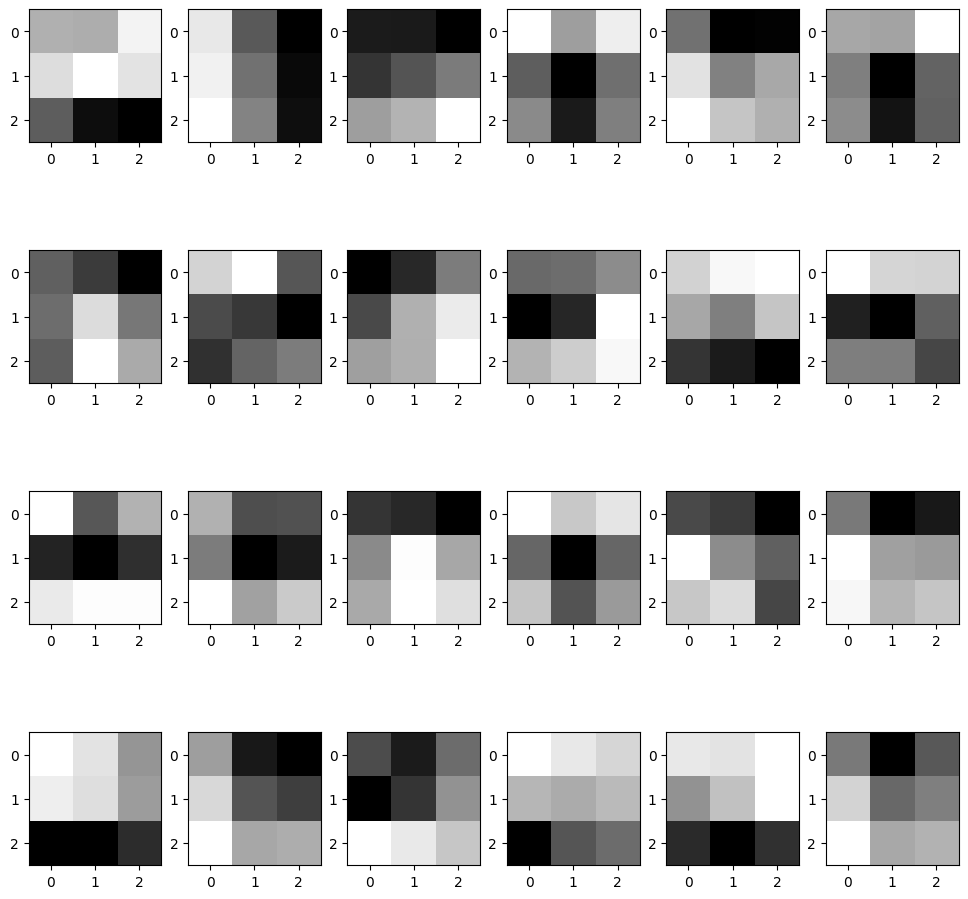

In [32]:
# We will be plotting a subplot of the filters
r, c = 4, 6
ix = 1
fig = plt.figure(figsize = (12, 12))

for i in range(r):
  f = filters[:, :, :, i]
  for j in range(c):
    # subplot the filter
    plt.subplot(r, c, ix)
    ix+=1
    plt.imshow(f[:, :, j], cmap = 'gray')


plt.show()

The above are the filters which are used for the convolution purpose.

We can see how this works on images

### Loading the image

In [34]:
import urllib.request as r

img_url = 'https://www.hindustantimes.com/ht-img/img/2023/10/04/550x309/CRICKET-IND-AUS-PRACTICE-1_1696397770262_1696397799388.jpg'

r.urlretrieve(img_url, 'temp_img.jpg')
img = load_img('temp_img.jpg', target_size = (224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [36]:
model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)

1/1 [==============================] - 0s 76ms/step


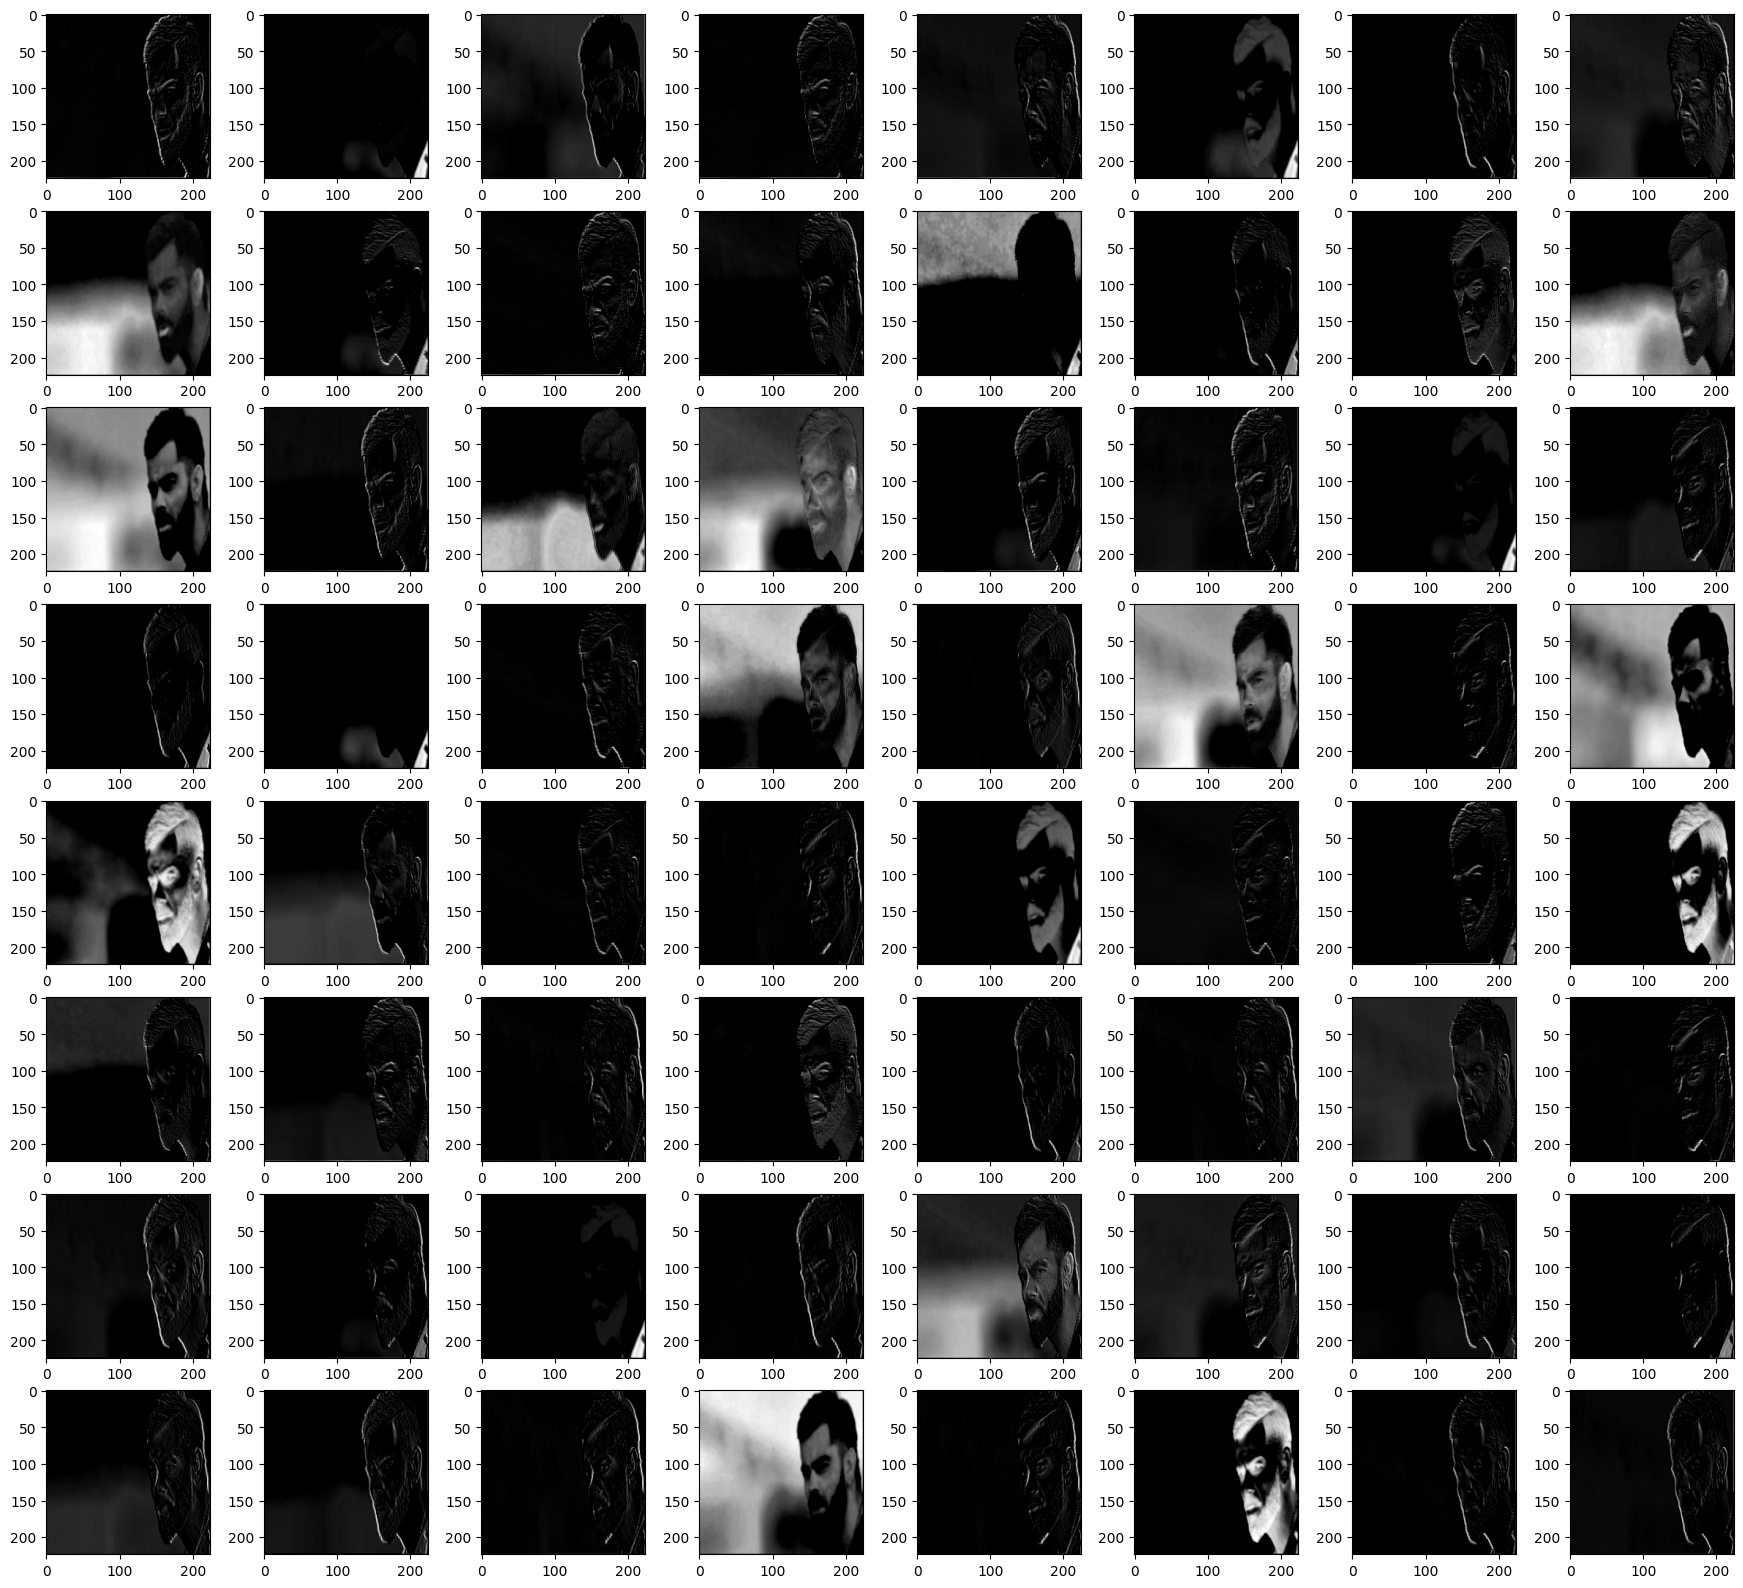

In [39]:
features = model1.predict(img)

fig = plt.figure(figsize = (22, 20))
for i in range(1, features.shape[3]+1):
  plt.subplot(8,8, i)
  plt.imshow(features[0, :, :, i-1], cmap = 'gray')

plt.show()

In [42]:
layer_idx = [2, 5, 9, 13, 17]

outputs = [model.layers[i].output for i in layer_idx]
model3 = Model(inputs = model.inputs, outputs = outputs)

1/1 [==============================] - 1s 944ms/step


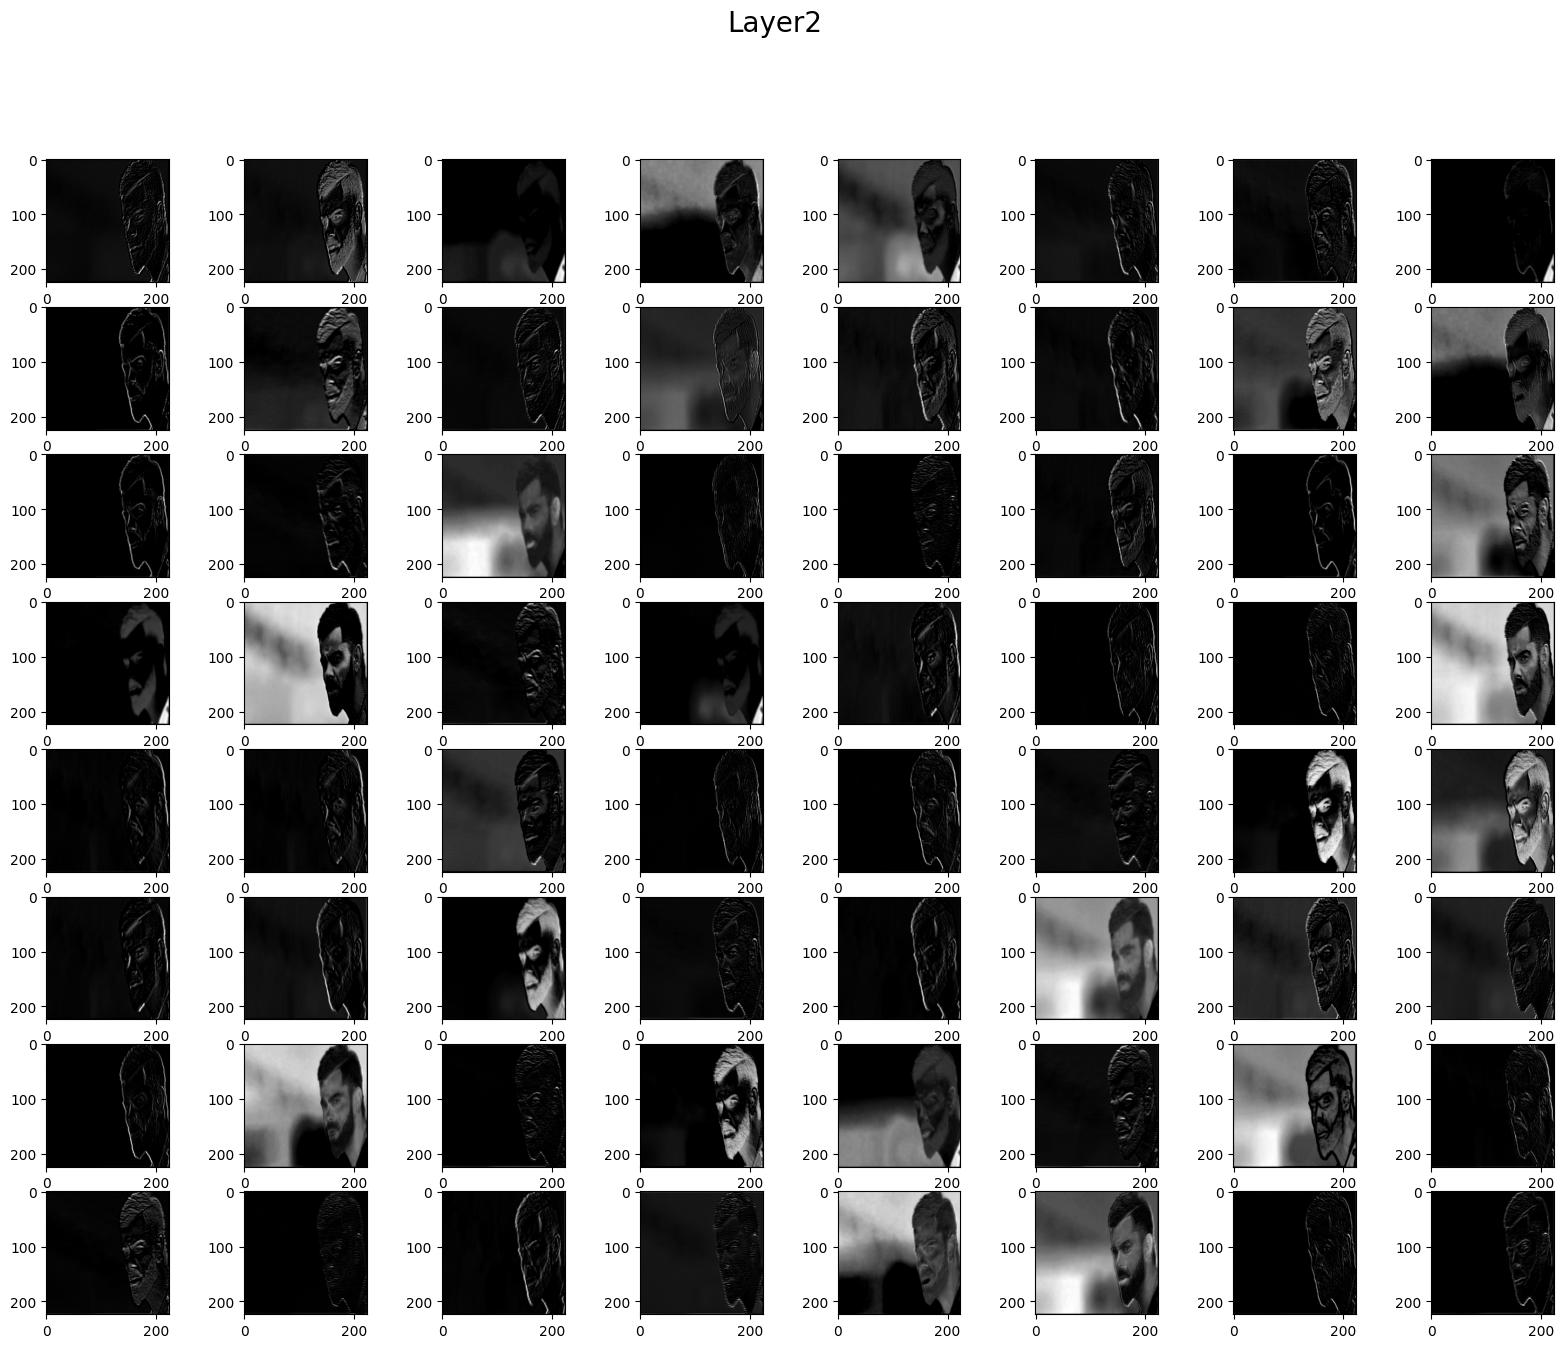

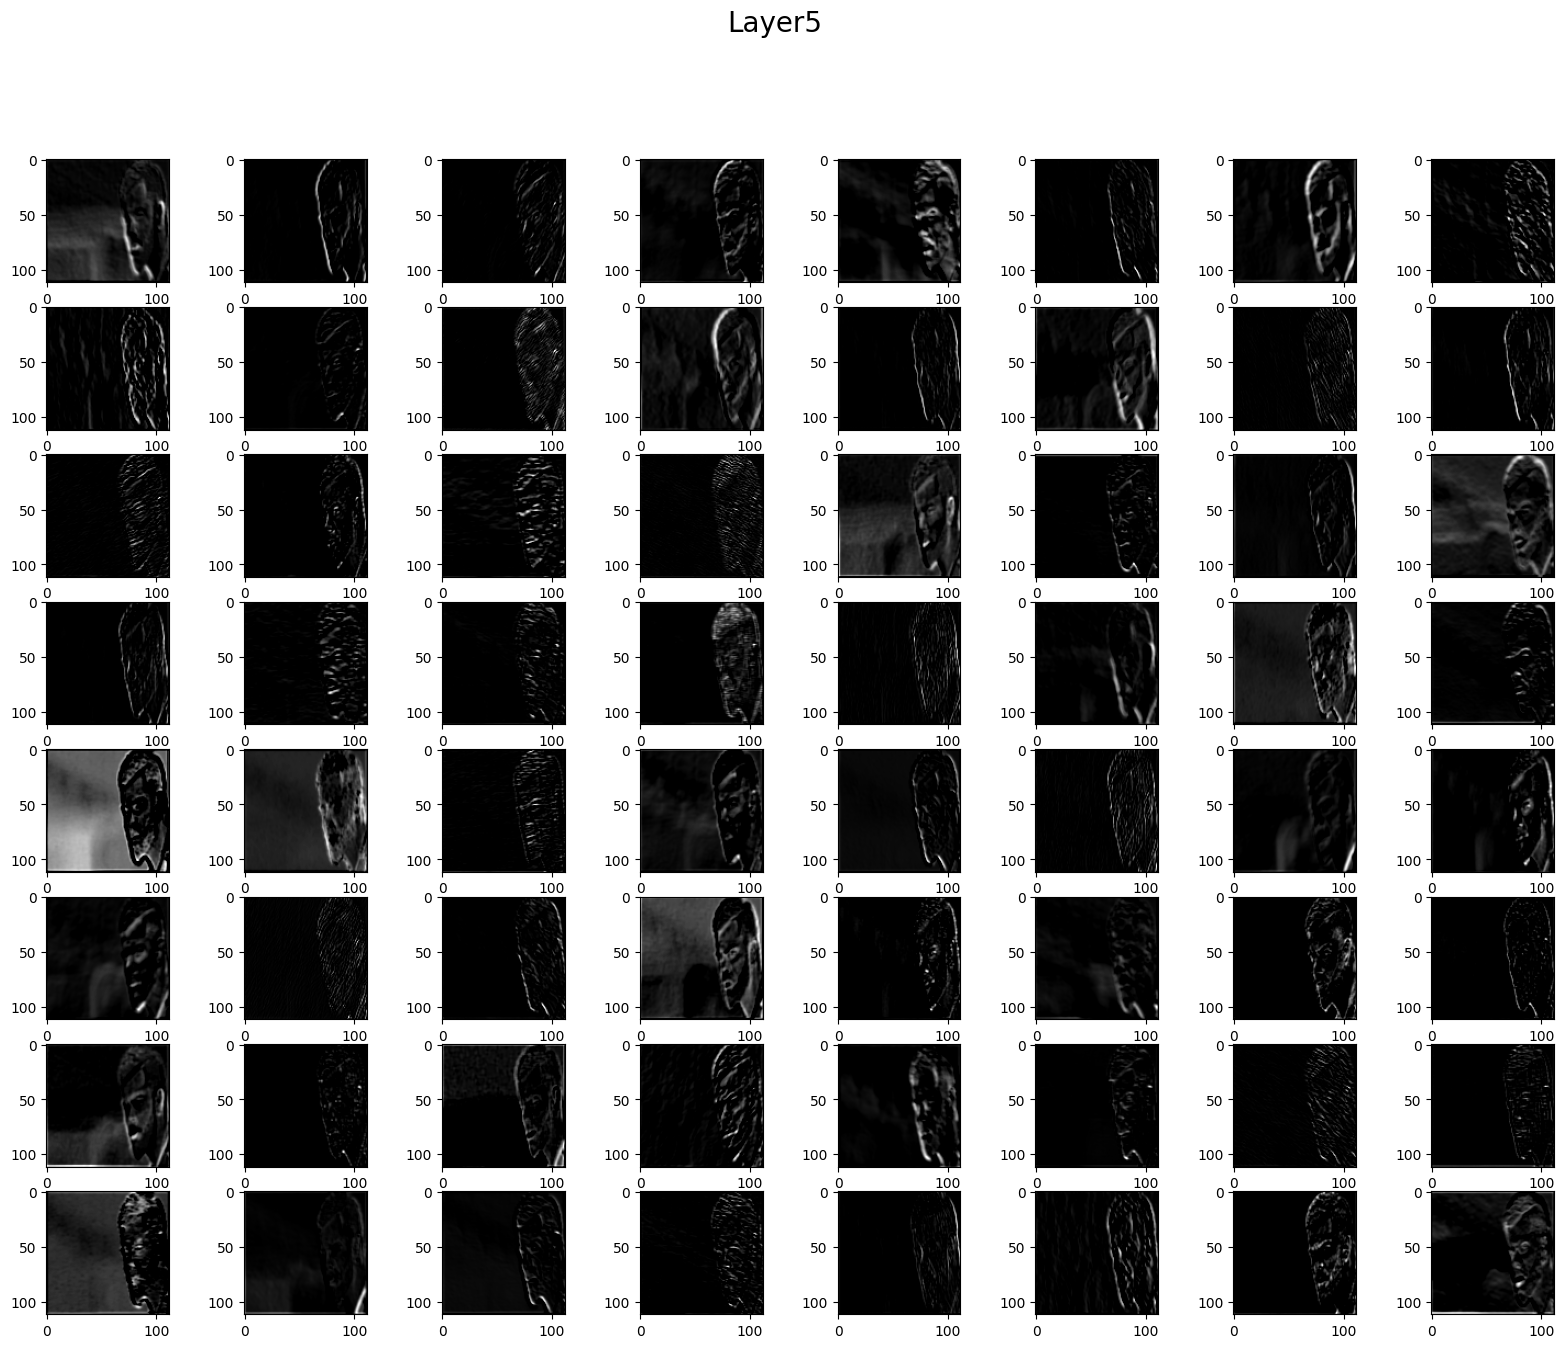

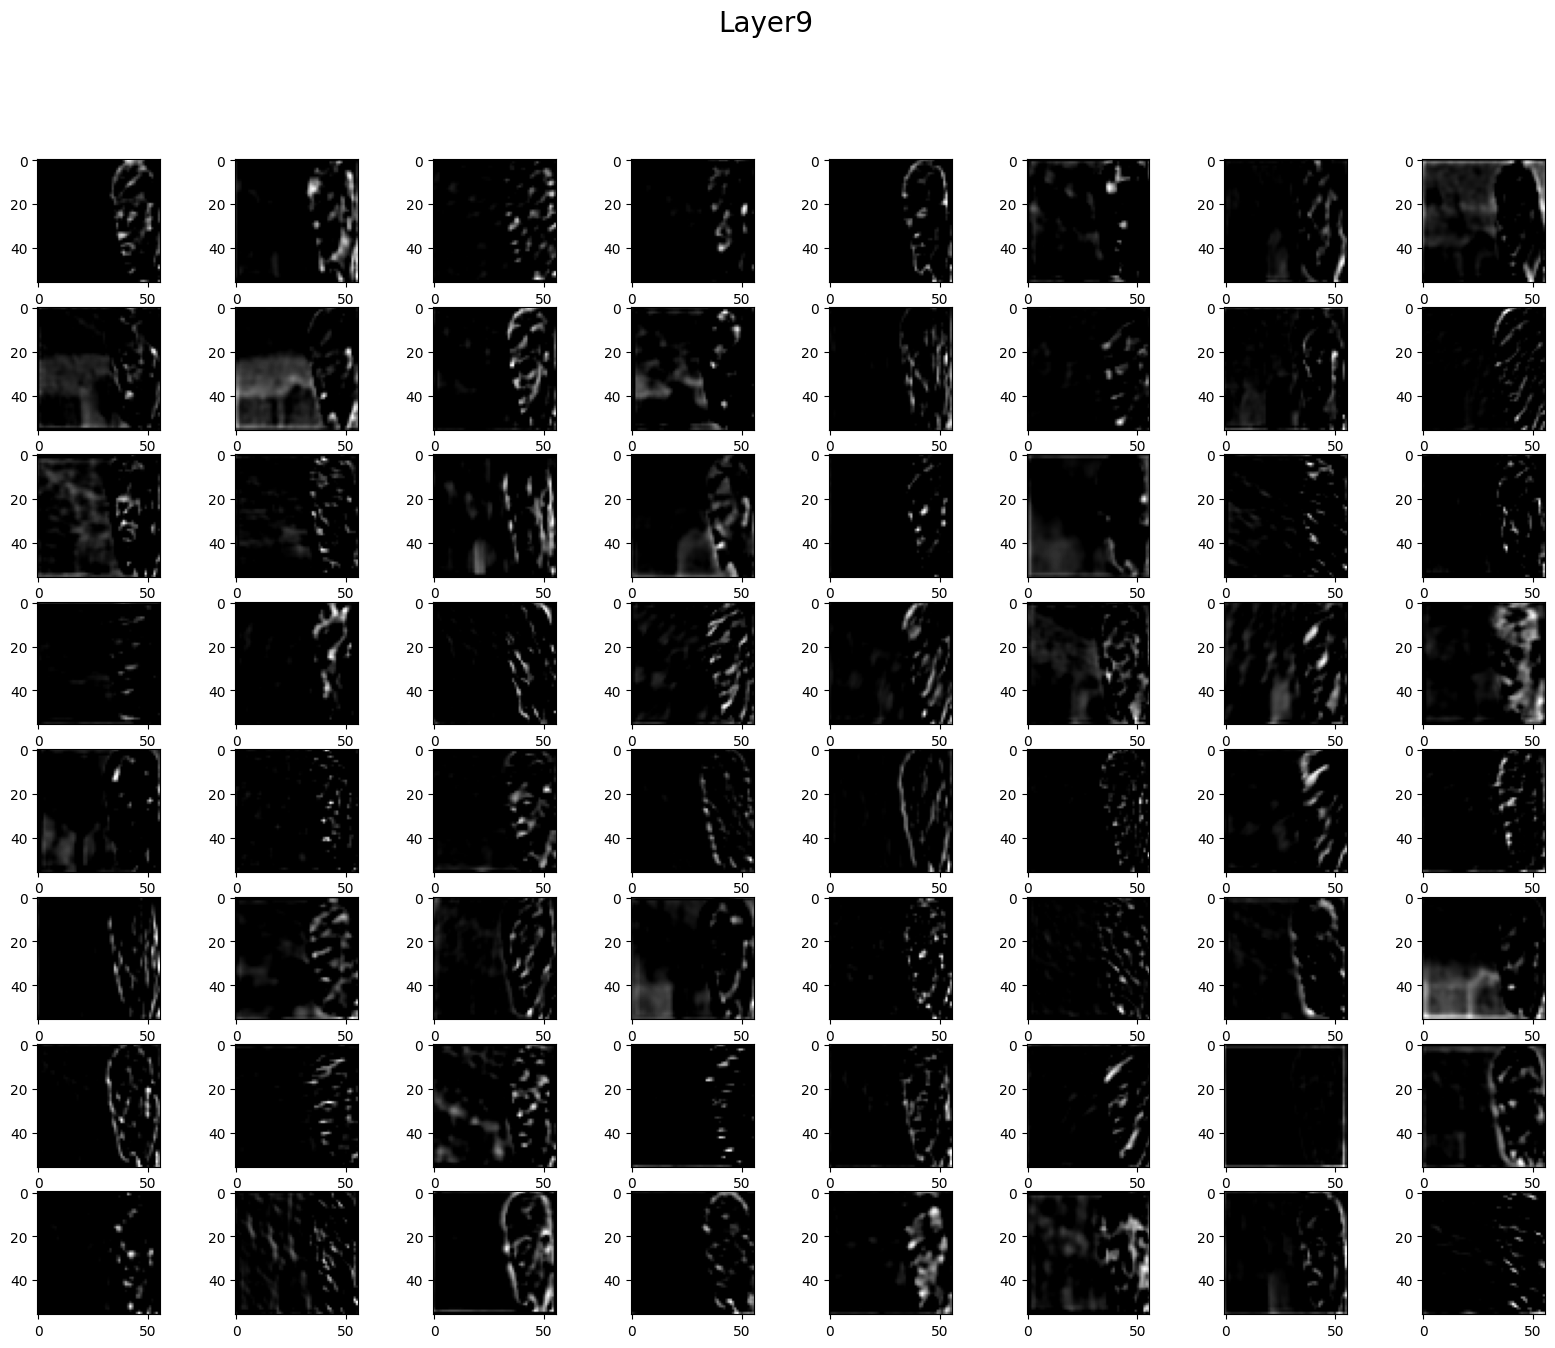

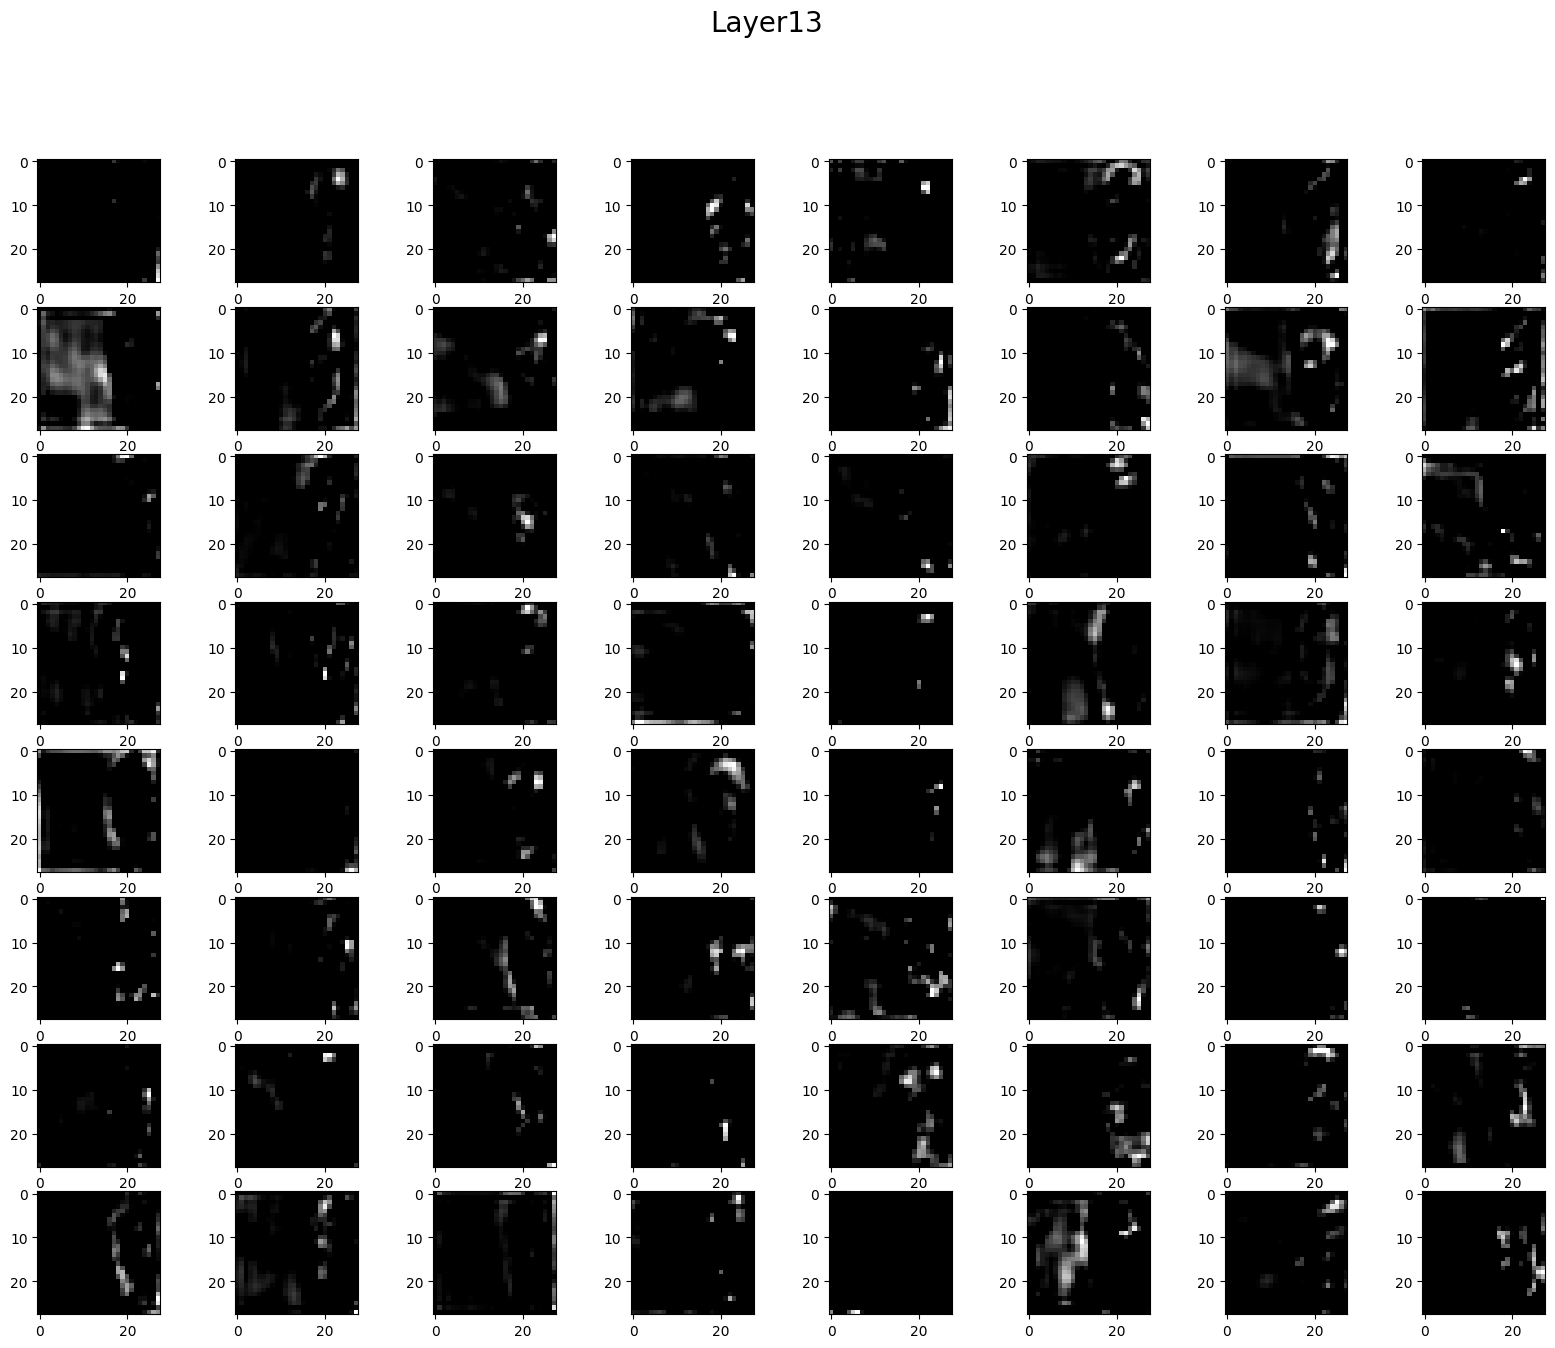

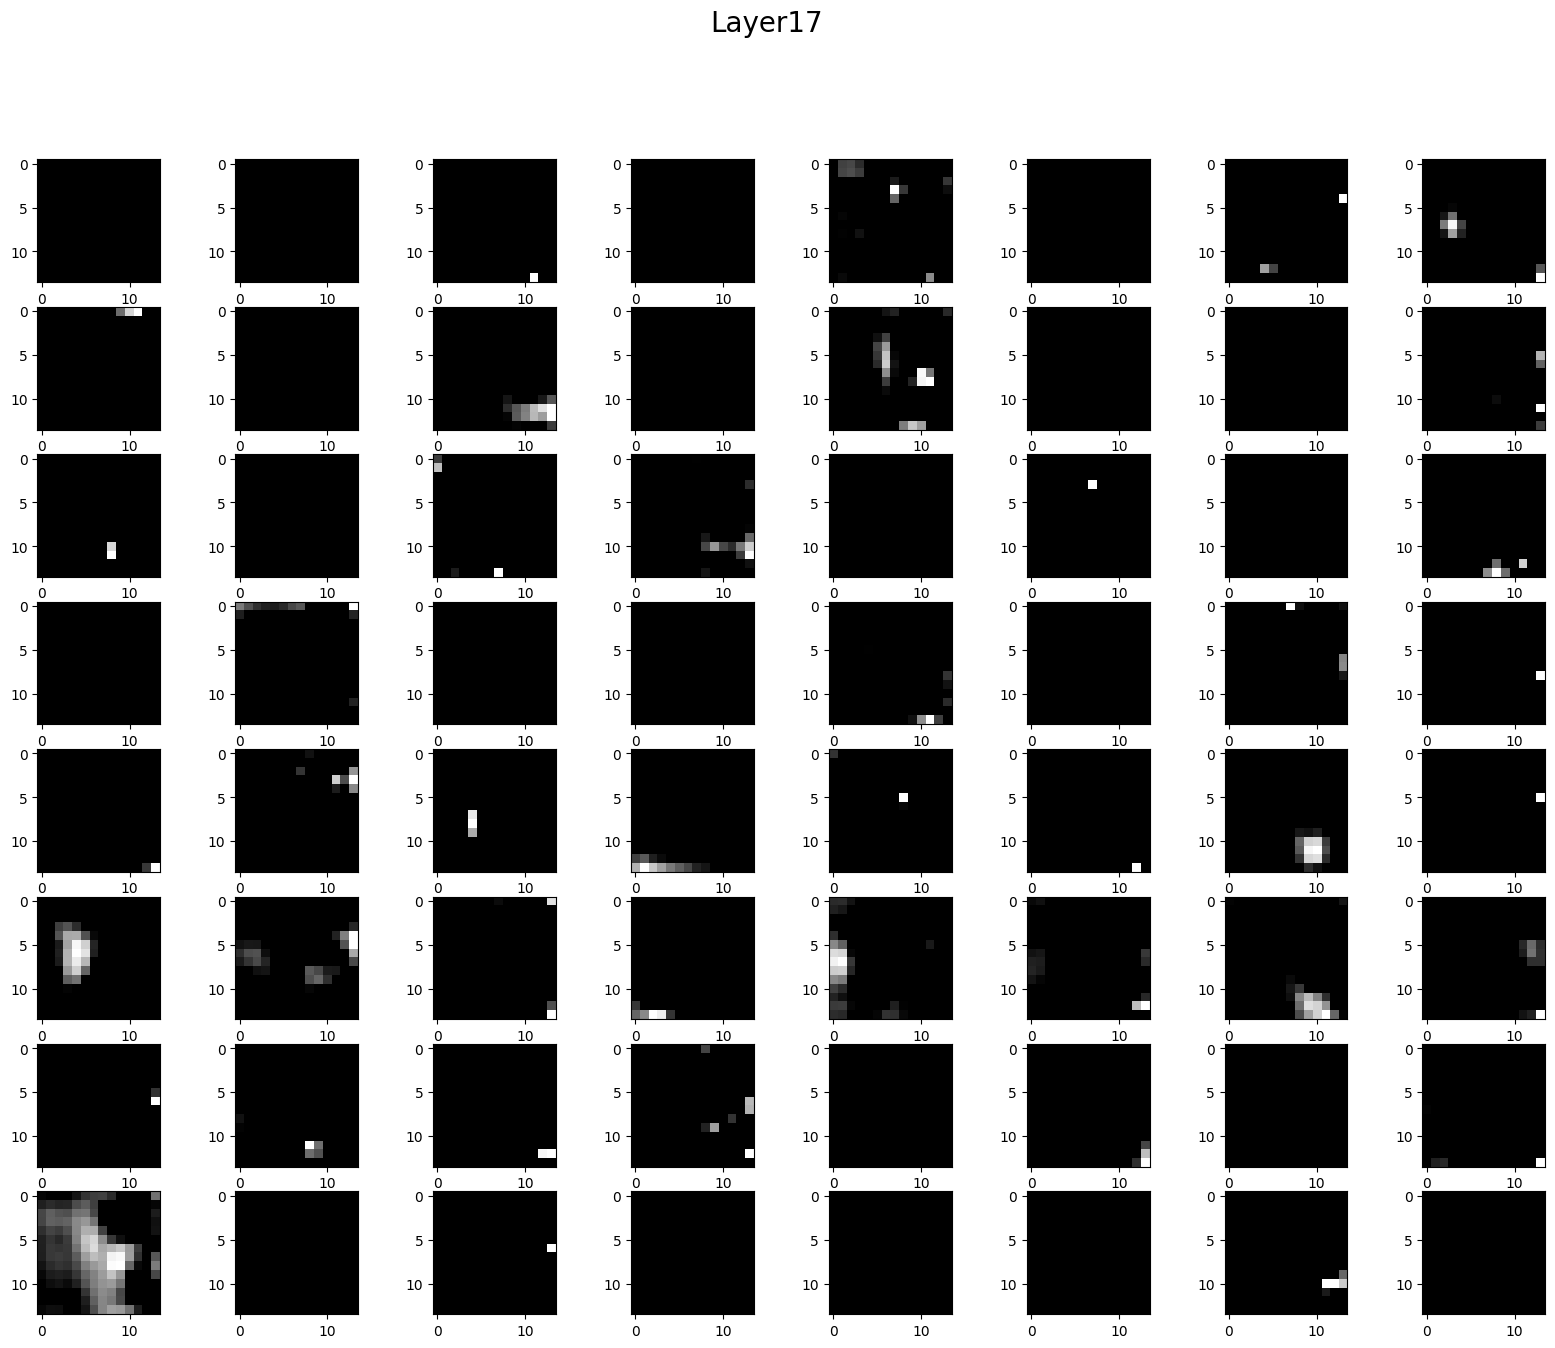

In [44]:
f_map = model3.predict(img)

for i, fmp in zip(layer_idx, f_map):
  fig = plt.figure(figsize = (20, 15))
  plt.suptitle('Layer{}'.format(i), fontsize = 20)
  for i in range(1, features.shape[3] + 1):
    plt.subplot(8,8,i)
    plt.imshow(fmp[0, :, :, i-1], cmap='gray')

plt.show()